In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r".\QQQ_US.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-03-11,51.43750,51.734375,50.31250,51.3125,43.760597,9688600
1,1999-03-12,51.12500,51.156250,49.65625,50.0625,42.694584,8743600
2,1999-03-15,50.43750,51.562500,49.90625,51.5000,43.920502,6369000
3,1999-03-16,51.71875,52.156250,51.15625,51.9375,44.293629,4905800
4,1999-03-17,51.93750,52.000000,51.40625,51.5625,43.973820,3965000


<h3><i> * Checking data types -- </i> </h3>

In [4]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

<h3><i> * Formating date -- </i> </h3>

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

<h3><i> * Creating new dataframe with date as index -- </i> </h3>

In [7]:
newDf = df.set_index("Date")
newDf.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-03-11,51.43750,51.734375,50.31250,51.3125,43.760597,9688600
1999-03-12,51.12500,51.156250,49.65625,50.0625,42.694584,8743600
1999-03-15,50.43750,51.562500,49.90625,51.5000,43.920502,6369000
1999-03-16,51.71875,52.156250,51.15625,51.9375,44.293629,4905800
1999-03-17,51.93750,52.000000,51.40625,51.5625,43.973820,3965000


In [8]:
#checking how many years the this dataframe has
pd.unique(newDf.index.year)

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022, 2023, 2024])

<h3><i> * Checking how many rows of data (days) for each year -- </i> </h3>

In [9]:
for i in pd.unique(newDf.index.year):
    print("Year " + str(i) + " Number of Rows " + str(len(newDf.loc[str(i)])))

Year 1999 Number of Rows 206
Year 2000 Number of Rows 252
Year 2001 Number of Rows 248
Year 2002 Number of Rows 252
Year 2003 Number of Rows 252
Year 2004 Number of Rows 252
Year 2005 Number of Rows 252
Year 2006 Number of Rows 251
Year 2007 Number of Rows 251
Year 2008 Number of Rows 253
Year 2009 Number of Rows 252
Year 2010 Number of Rows 252
Year 2011 Number of Rows 252
Year 2012 Number of Rows 250
Year 2013 Number of Rows 252
Year 2014 Number of Rows 252
Year 2015 Number of Rows 252
Year 2016 Number of Rows 252
Year 2017 Number of Rows 251
Year 2018 Number of Rows 251
Year 2019 Number of Rows 252
Year 2020 Number of Rows 253
Year 2021 Number of Rows 252
Year 2022 Number of Rows 251
Year 2023 Number of Rows 250
Year 2024 Number of Rows 77


<h3><i> * Find out the lowest price and date for each year -- </i> </h3>

In [10]:
# adding year column to df:
df['year'] = df['Date'].dt.year

# Group the DataFrame by 'year', find the index of the minimum 'Close' value in each group
min_close_indices = df.groupby('year')['Close'].idxmin()

# Use the indices to get the corresponding rows from the original DataFrame
lowprice_df_extracted = df.loc[min_close_indices]

lowprice_df_extracted['month'] = lowprice_df_extracted.Date.dt.month

lowprice_df_extracted['month_name'] = pd.to_datetime(lowprice_df_extracted['month'], format='%m').dt.month_name()

lowprice_df_extracted.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,month_name
8,1999-03-23,50.312500,50.500000,48.718750,48.812500,41.628548,10962400,1999,3,March
451,2000-12-20,57.312500,58.375000,54.750000,55.734375,47.531696,81432100,2000,12,December
636,2001-09-21,27.410000,28.969999,27.200001,28.190001,24.041157,112341900,2001,9,September
900,2002-10-09,19.940001,20.530001,19.840000,20.059999,17.107676,103301000,2002,10,October
1004,2003-03-11,24.059999,24.240000,23.780001,23.799999,20.297241,54934200,2003,3,March


<h3><i> * get the frequency of the months in which IVV was the lowest in that year for the past 24 years -- </i> </h3>

In [11]:
## get the frequency of the months in which IVV was the lowest in that year for the past 24 years
lowprice_df_extracted_freq = lowprice_df_extracted.month_name.value_counts().reset_index()
lowprice_df_extracted_freq.columns = ['month', 'count']
lowprice_df_extracted_freq

,month,count
0,March,6
1,January,5
2,December,3
3,August,3
4,April,2
5,July,2
6,February,2
7,September,1
8,October,1
9,November,1


<h2><i> * Plot the charts for Time Series Trend Over 24 years since Year 2000 -- </i> </h2>

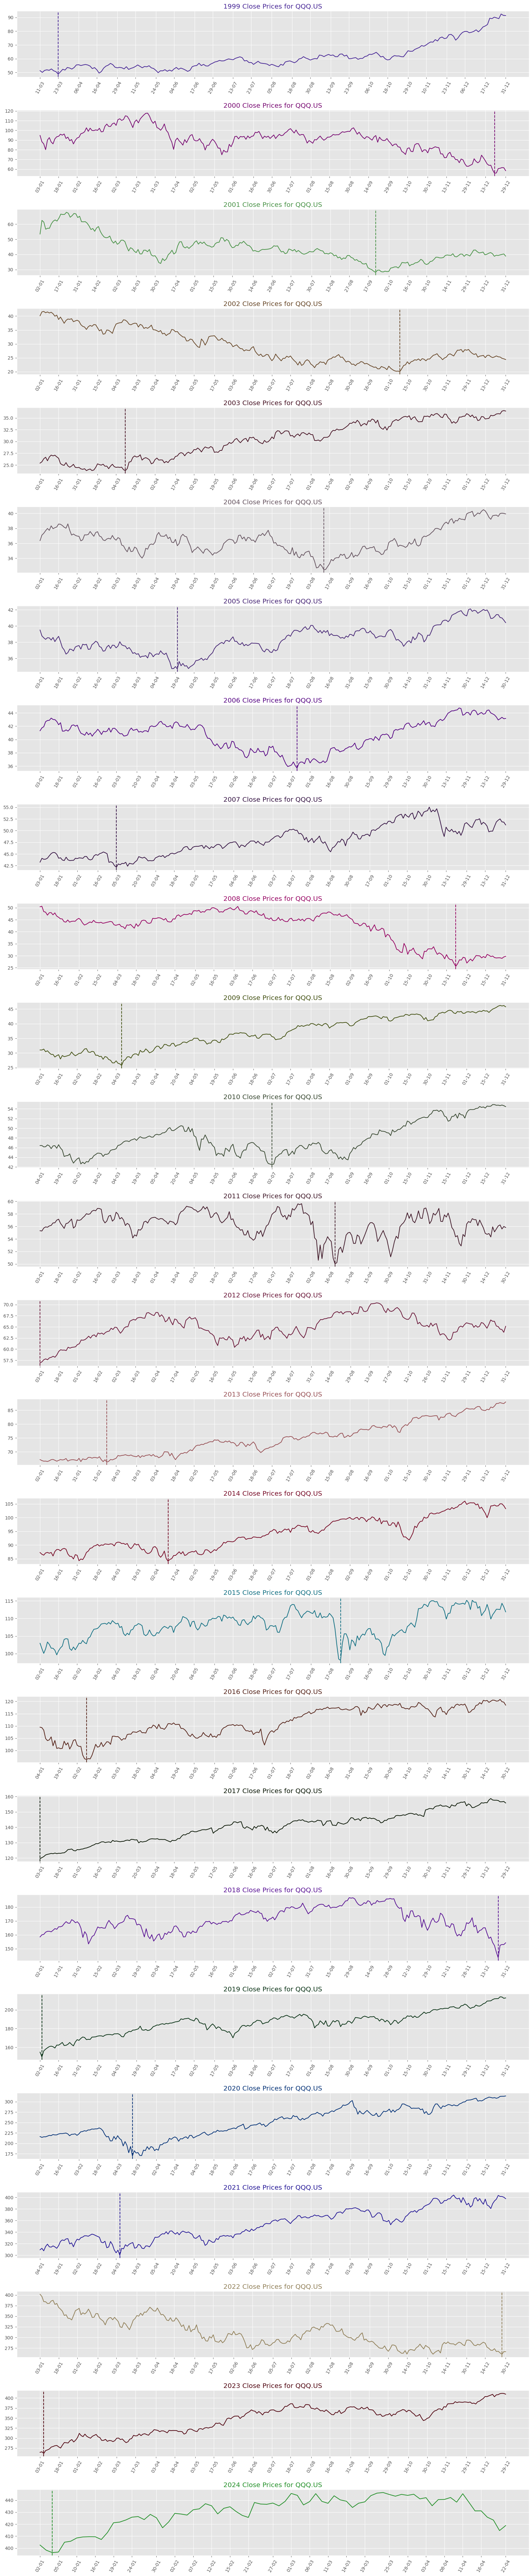

In [12]:
import random
plt.style.use("ggplot")
num_labels = 25  # Adjust this value to control the number of labels
num_of_years = np.unique(newDf.index.year)

fig, ax=plt.subplots(len(num_of_years), 1, figsize=(20, 100))

for i in range(0, len(num_of_years)):
    year = str(num_of_years[i])
    x_axis= np.arange(len(newDf.loc[year].index))
    label_indices = np.linspace(0, len(x_axis)-1, num_labels, dtype=int)
    
    random_color = "#" + ''.join([random.choice('0123456789') for _ in range(6)])
    ax[i].plot(newDf.loc[year].index.strftime('%m-%d'), newDf.loc[year].Close, color=random_color, label= year)

    # Find the lowest point
    min_close = newDf.loc[year].Close.min()
    min_date = newDf.loc[year][newDf.loc[year].Close == min_close].index.strftime('%m-%d')[0]

    # Add a vertical line at the lowest point
    ax[i].axvline(x=min_date, color=random_color, linestyle='--')

    
    ax[i].set_xticks(x_axis[label_indices])
    ax[i].set_xticklabels([newDf.loc[year].index.strftime('%d-%m')[i] for i in label_indices], rotation=60)
    ax[i].set_title(year + ' Close Prices for QQQ.US', color=random_color)  # Add subtitle for the first chart


plt.subplots_adjust(hspace=0.5)  # Increase the spacing between the subplots
plt.savefig('timeserise_qqq_us.png')
plt.show()